#### 1 Загрузите файл HR.csv в pandas dataframe

In [1]:
import pandas as pd
hr = pd.read_csv('hr.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### 2 Рассчитайте основные статистики для переменных(среднее,медиана,мода,мин/макс,сред.отклонение).

In [2]:
hr.describe(percentiles=[.5])
stats = hr.describe(percentiles=[.5])
stats.index=['количество', 'среднее','станд.откл.','минимум','медиана','максимум']
stats[1:]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
среднее,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
станд.откл.,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
минимум,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
медиана,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
максимум,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [3]:
# мода
hr.mode().head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low


#### 3 Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.

<AxesSubplot:>

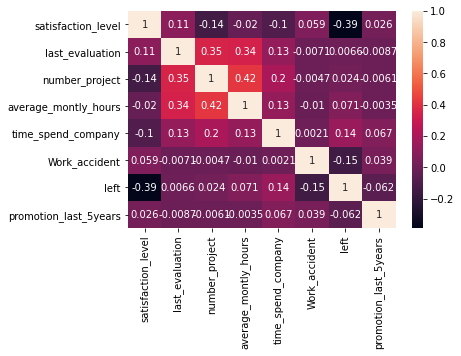

In [4]:
import seaborn as sns
corr_matrix = hr.iloc[:,0:8].corr()
sns.heatmap(corr_matrix, annot=True)

In [5]:
# самые скоррелированные признаки - 'average_montly_hours' и 'number_project' - коэфиициент корреляции 0,42
# наименее скоррелированные признаки - 'time_spend_company' и 'Work_accident' - коэфиициент корреляции 0,0021

#### 4 Рассчитайте сколько сотрудников работает в каждом департаменте.

In [6]:
hr['department'].groupby(by=hr['department']).count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

#### 5 Показать распределение сотрудников по зарплатам.

In [7]:
hr['salary'].groupby(by=hr['salary']).count()

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

#### 6 Показать распределение сотрудников по зарплатам в каждомдепартаменте по отдельности

In [8]:
hr.groupby(by=['department', 'salary']).salary.count()

department   salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: salary, dtype: int64

#### 7 Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

In [9]:
# необходимо взять две независимые выборки:
# 1.Среднее количество часов на рабочем месте в месяц для сотрудников с высоким окладом
# 2.Среднее количество часов на рабочем месте в месяц для сотрудников с низким окладом
# проверить гипотезу с помощью Т-критерия Стьюдента для независимых выборок

<AxesSubplot:>

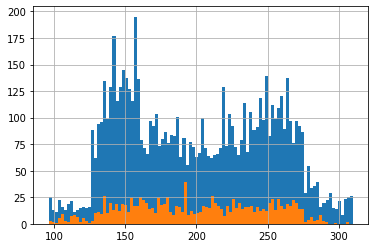

In [10]:
ave_hours_salary_lo = hr.loc[hr['salary']=='low', 'average_montly_hours']
ave_hours_salary_hi = hr.loc[hr['salary']=='high', 'average_montly_hours']
ave_hours_salary_lo.hist(bins=100)
ave_hours_salary_hi.hist(bins=100)

In [11]:
from scipy import stats
print(stats.normaltest(ave_hours_salary_lo))
print(stats.normaltest(ave_hours_salary_hi))

NormaltestResult(statistic=4477.067418431068, pvalue=0.0)
NormaltestResult(statistic=339.6780763630229, pvalue=1.7371723411635018e-74)


In [12]:
# p-value << 5%, распределения имеют статистически значимое различие от нормальных => будем использовать тест Манна-Уитни:
# H0 - среднее время проводимое на работе у сотрудников с высоким окладом и у сотрудников с низким окладом одинаково
# H1 - среднее время проводимое на работе у сотрудников с высоким окладом и у сотрудников с низким окладом различается

In [13]:
stat, p = stats.mannwhitneyu(ave_hours_salary_lo, ave_hours_salary_hi)
print('Statistics=%.3f, p=%.3f' % (stat, p))

alpha = 0.05  
if p > alpha:
    print('Одинаковые распределения (не отвергаем H0)')
else:
    print('Разные распределения (отвергаем H0)')

Statistics=4542795.500, p=0.824
Одинаковые распределения (не отвергаем H0)


In [14]:
# гипотеза, что сотрудники с высоким окладом проводят на работе больше времени, 
# чем сотрудники с низким окладом, тестом Манна_Уитни не подтвердилась

#### 8 Рассчитать следующие показатели среди уволившихся и неуволившихся сотрудников (по отдельности):
- доля сотрудников с повышением за последние 5 лет
- средняя степень удовлетворенности
- среднее количество проектов

In [15]:
dismissed = hr.loc[hr['left']==1]
working = hr.loc[hr['left']==0]

In [16]:
print('Среди уволившихся сотрудников:')
print(f"Доля сотрудников с повышением за последние 5 лет: {dismissed.loc[dismissed['promotion_last_5years']==1, 'promotion_last_5years'].count() / len(dismissed)*100:0.2f}%")
print(f"Средняя степень удовлетворенности: {dismissed.satisfaction_level.mean():0.2f}")
print(f"Среднее количество проектов: {dismissed.number_project.mean():0.2f}")
print('------------------------------')
print('Среди работающих сотрудников:')
print(f"Доля сотрудников с повышением за последние 5 лет: {working.loc[working['promotion_last_5years']==1, 'promotion_last_5years'].count() / len(working)*100:0.2f}%")
print(f"Средняя степень удовлетворенности: {working.satisfaction_level.mean():0.2f}")
print(f"Среднее количество проектов: {working.number_project.mean():0.2f}")

Среди уволившихся сотрудников:
Доля сотрудников с повышением за последние 5 лет: 0.53%
Средняя степень удовлетворенности: 0.44
Среднее количество проектов: 3.86
------------------------------
Среди работающих сотрудников:
Доля сотрудников с повышением за последние 5 лет: 2.63%
Средняя степень удовлетворенности: 0.67
Среднее количество проектов: 3.79


#### 9 Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оценить качество модели на тестовой выборке

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
score=0
for i in range(0,100):
    X_train, X_test, y_train, y_test = train_test_split(hr.loc[:,['satisfaction_level', 'last_evaluation', 'number_project',
                                                                  'average_montly_hours', 'time_spend_company', 'Work_accident',
                                                                  'promotion_last_5years']],
                                                        hr['left'], 
                                                        test_size=0.3)
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    score += accuracy_score(y_test, lda.predict(X_test))
print(f'Точность:{score / i :0.2f}')

Точность:0.77


In [19]:
# В среднем, на каждые 4 предсказания - 1 ошибка. Качество модели не очень хорошее

#### 10 Загрузить jupyter notebook с решение на github и прислать ссылку